# Task 1. Data Preprocessing

## Loading the dataset into a DataFrame

In [2]:
import pandas as pd
import numpy as np
# load dataset into a pandas dataframe
data = pd.read_csv('Fish.csv')
data.head()

,Height,Width,Weight
0,11.5200,4.0200,242.0
1,12.4800,4.3056,290.0
2,12.3778,4.6961,340.0
3,12.7300,4.4555,363.0
4,12.4440,5.1340,430.0


## Normalizing the feature variable

In [3]:
# Function to normalize the features: assumes the last column to be target variable (y)
def normalize(data: pd.DataFrame) -> None:
  for col in data.columns[:-1]:
    # standardizing data
    data[col] = (data[col] - data[col].mean())/data[col].std()
normalize(data)
data.head()

,Height,Width,Weight
0,0.594700,-0.235784,242.0
1,0.818674,-0.066369,290.0
2,0.794830,0.165271,340.0
3,0.877001,0.022550,363.0
4,0.810275,0.425028,430.0


In [3]:
# printing database info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  159 non-null    float64
 1   Width   159 non-null    float64
 2   Weight  159 non-null    float64
dtypes: float64(3)
memory usage: 3.9 KB


## Filling Null Values

In [4]:
# does not fill the last column (target = weight field)
def fillNans(data: pd.DataFrame) -> None:
  for col in data.columns[:-1]:
    mean = data[col].mean(skipna=True)
    data[col].fillna(value=mean, inplace=True)
fillNans(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  159 non-null    float64
 1   Width   159 non-null    float64
 2   Weight  159 non-null    float64
dtypes: float64(3)
memory usage: 3.9 KB


## Shuffle split the dataset into training and testing sets (80% train; 20% test)

In [5]:
# Function to get a desired test train split of the data; give different seed for increased randomness
def test_train_split(data: pd.DataFrame, test_size = 0.2, random_seed = 0) -> tuple[pd.DataFrame, pd.DataFrame]:
  np.random.seed(random_seed)
  # getting a shuffled permutation of the data indices
  indices = np.random.permutation(data.shape[0])
  # getting the number of indices in testing set
  data_test_size = int(data.shape[0]*test_size)
  # returning separate test and train sets
  return data.iloc[indices[:data_test_size]], data.iloc[indices[data_test_size:]]
test, train = test_train_split(data)
train

,Height,Width,Weight
90,-0.804556,-0.250614,110.0
143,0.146751,1.024149,1550.0
130,-0.707990,-0.019626,300.0
16,1.374037,0.514837,700.0
96,-0.391487,-0.411961,225.0
...,...,...,...
9,1.226167,0.321458,500.0
103,-0.420837,-0.048929,260.0
67,0.099157,-0.597392,170.0
117,0.505250,0.940509,650.0


# Task 2. Polynomial Regression

## Transforming data into polynomial of n degree

In [6]:
# Function to polynomial transform data; assumes the last column to be the target variable and ignores it
def poly_transform(data: pd.DataFrame, degree: int = 3) -> None: 
  # separating columns to make polynomial
  cols = data.columns[:-1]
  f = len(cols)
  # first degree always present +1 to include last one
  for i in range(2, degree+1):
    c = 0
    for col in cols:
      data.insert(f+i-2+c*(i-1), col+str(i), data[col]**i)
      c+=1
def insert_dummy1s(data: pd.DataFrame) -> None:
  # adding dummy ones
  data.insert(0, 'dummy1s', np.ones(data.shape[0]))
data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, 5)
normalize(data)
insert_dummy1s(data)
data

,dummy1s,Height,Width,Height2,Height3,Height4,Height5,Width2,Width3,Width4,Width5,Weight
0,1.0,0.594700,-0.235784,0.392817,0.185395,0.016001,-0.105877,-0.403995,-0.492440,-0.524233,-0.522363,242.0
1,1.0,0.818674,-0.066369,0.659199,0.455473,0.263529,0.105615,-0.248501,-0.367809,-0.432247,-0.458196,290.0
2,1.0,0.794830,0.165271,0.629827,0.424645,0.234296,0.079786,-0.018630,-0.168555,-0.273168,-0.338130,340.0
3,1.0,0.877001,0.022550,0.732067,0.533038,0.338127,0.172466,-0.162620,-0.295394,-0.376038,-0.416971,363.0
4,1.0,0.810275,0.425028,0.648825,0.444556,0.253149,0.096419,0.262866,0.097913,-0.040834,-0.146617,430.0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.0,-1.605287,-1.793735,-1.091022,-0.803743,-0.639229,-0.535530,-1.333789,-1.014838,-0.811191,-0.678307,12.2
155,1.0,-1.526056,-1.867646,-1.073273,-0.800349,-0.638641,-0.535435,-1.355484,-1.020401,-0.812505,-0.678601,13.4
156,1.0,-1.561752,-1.875476,-1.081599,-0.802005,-0.638939,-0.535485,-1.357663,-1.020931,-0.812624,-0.678626,12.2
157,1.0,-1.422748,-1.394163,-1.046125,-0.794257,-0.637403,-0.535200,-1.181342,-0.963426,-0.795037,-0.673456,19.7


## Building Models

### Error Function

In [7]:
def mse(Y_true: np.ndarray, Y_pred: np.ndarray) -> float:
  return np.mean((Y_true - Y_pred)**2)

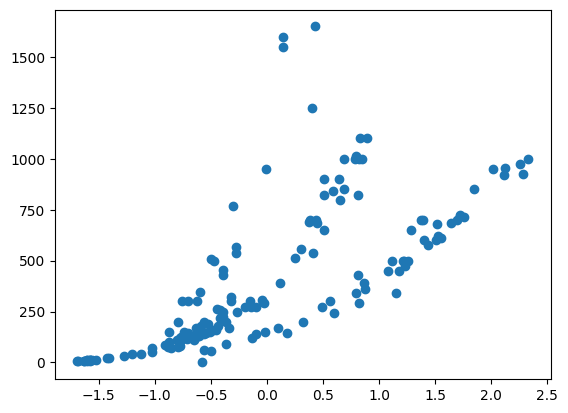

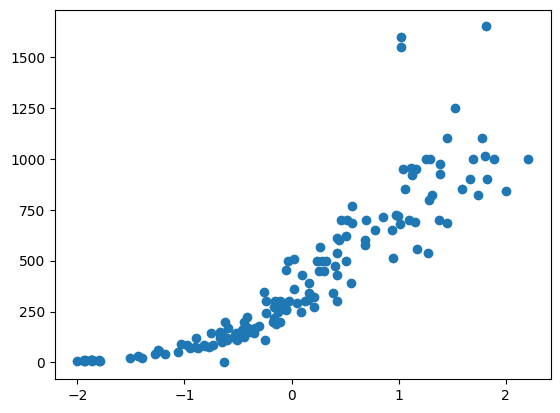

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data['Height'], data['Weight'])
plt.show()
plt.scatter(data['Width'], data['Weight'])
plt.show()

### Differentiating generalized regularized error function
To implement the gradient descent algorithms; we must first differentiate both loss functions (to find the gradient) and then write them in matrix form (for faster operations).
Differentiating the equation (w.r.t. W) we get:

SUM(tn - wT \* Xn) + lambda \* (0.5 \* q) \* SUM(|wj|^(q-1))

as a matrix equation:

Y - (W.T * X) + lambda * 0.5 * q * (W**(q-1)) (for q = 2 or 4)

Y - (W.T * X) + lambda * 0.5 * q * (abs(W)**(-0.5)) (for q = 0.5)

For q = 1:

SUM(tn - wT \* Xn) + lambda \* 0.5 \* SUM(sign(wj))

as a matrix equation:

Y - (W.T * X) + lambda \* 0.5 \* (sign(W))

### Batch Gradient Descent

In [11]:
def batch(train: pd.DataFrame, q: float, lmbda = 0.5, learning_rate = 0.1, max_iterations = 500) -> np.ndarray:
  X = np.array(train.iloc[:, :-1])
  Y = np.array(train.iloc[:, -1])
  # number of features except last column
  W = np.ones(train.shape[1]-1)
  n = len(train)
  for _ in range(max_iterations):
    Y_pred = X @ W
    if q == 0.0:
      gradient = (1/n) * X.T @ (Y_pred - Y)
    elif q == 0.5:
      gradient = (1/n) * X.T @ (Y_pred - Y) + (lmbda * 0.5 * q) * (np.abs(W) ** (-0.5))
    elif q == 1.0:
      gradient = (1/n) * X.T @ (Y_pred - Y) + (lmbda * 0.5) * np.sign(W)
    else:
      gradient = (1/n) * X.T @ (Y_pred - Y) + (lmbda * 0.5 * q) * (W ** (q-1))
    W -= learning_rate * gradient
  return W
data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, 3)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = batch(train, 0, 1, 0.4, 50000)
### Best values for each degree (q = 0)
# deg 1 :: 54929.79617184895 = 0, 1, 0.05, 50000
# deg 2 :: 48393.66927539276 = 0, 1, 0.05, 50000
# deg 3 :: 44971.89139002793 = 0, 1, 0.4, 50000
# deg 4 :: 45299.592296283336 = 0, 1, 0.05, 50000
# deg 5 :: 45460.679291457775 = 0, 1, 0.05, 50000
# deg 6 :: 45978.55987871879 = 0, 1, 0.007, 50000
# deg 7 :: 46078.72662159866 = 0, 1, 0.001, 60000
# deg 8 :: 46245.19880363616 = 0, 1, 0.0005, 60000
# deg 9 :: 46730.08623052122 = 0, 1, 0.0005, 60000

### Best values for each q
# degree 4 best for 0.5, 1e-20 , 0.05 - 45299.59229627913
# degree 4 best for 1, 1e-20, 0.05 - 45299.592296279145
# degree 4 best for 2, 1e-20 , 0.05 - 45298.59229627914
# degree 4 best for 4, 1e-20 , 0.05 - 45299.59229627919
mse(test.iloc[:, -1], test.iloc[:, :-1] @ W)

45090.44767849162

**Inference:** We found degree 3 to be the best polynomial model with learning rate 0.4, trained for 50000 iterations.

*Note:* Degree 4 and 5 also give similar results, with learning rate 0.05.

### Stochastic Gradient Descent

In [10]:
import random
def stochastic(train: pd.DataFrame, q: float, lmbda = 1e-20, learning_rate = 0.1, max_iterations = 500, random_state = 0) -> np.ndarray:
  X = np.array(train.iloc[:, :-1])
  Y = np.array(train.iloc[:, -1])
  # number of features except last column
  W = np.ones(train.shape[1]-1)
  n = len(train)
  random.seed(random_state)
  for _ in range(max_iterations):
    # select a random next row
    nextrow = random.randint(0, len(train)-1)
    # extract features and target
    x_i = X[nextrow]
    y_i = Y[nextrow]
    
    # Apply SGD update rule
    y_pred = x_i @ W
    if q == 0.0:
      gradient = (1/n) * x_i * (y_pred - y_i)
    elif q == 0.5:
      gradient = (1/n) * x_i * (y_pred - y_i) + (lmbda*0.5*q)*(np.abs(W)**(-0.5))
    elif q == 1:
      gradient = (1/n) * x_i * (y_pred - y_i) + (lmbda*0.5)*np.sign(W)
    else:
      gradient = (1/n) * x_i * (y_pred - y_i) + (lmbda*0.5*q)*(W**(q-1))
    W -= learning_rate * gradient
  return W
data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, 6)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0, 1, 6, 50000)
### Best values for each degree (q = 0)
# deg 1 :: 51524.5664806014 = 0, 1, 6, 50000
# deg 2 :: 44579.855964236376 = 0, 1, 9, 50000
# deg 3 :: 42128.08166185162 = 0, 1, 8, 50000
# deg 4 :: 40691.896131864974 = 0, 1, 7, 50000
# deg 5 :: 40220.34835530856 = 0, 1, 7, 50000
# deg 6 :: 39978.721480372464 = 0, 1, 6, 50000
# deg 7 :: 40234.17380216446 = 0, 1, 5, 50000
# deg 8 :: 40937.64279047755 = 0, 1, 4, 50000
# deg 9 :: 42799.8218507524 = 0, 1, 3, 50000

### Best values for each q
# deg 5 :: 40220.34835530856 = 0.5, 1e-20, 7, 50000
# deg 5 :: 40220.34835530856 = 1, 1e-20, 7, 50000
# deg 5 :: 40219.34835530851 = 2, 1e-20, 7, 50000
# deg 5 :: 40220.3483553103 = 4, 1e-20, 7, 50000
mse(test.iloc[:, -1], test.iloc[:, :-1] @ W)

39978.72148037247

**Inference:** We found degree 6 to be the best polynomial model with learning rate 6, trained for 50000 iterations.

*Note:* Degree 5 and 7 also give similar results, for learning rates 7 and 5 respectively.

# Task 3. Graph Plotting

### Polynomial Regression Surface plot

#### Degree 1 best fit

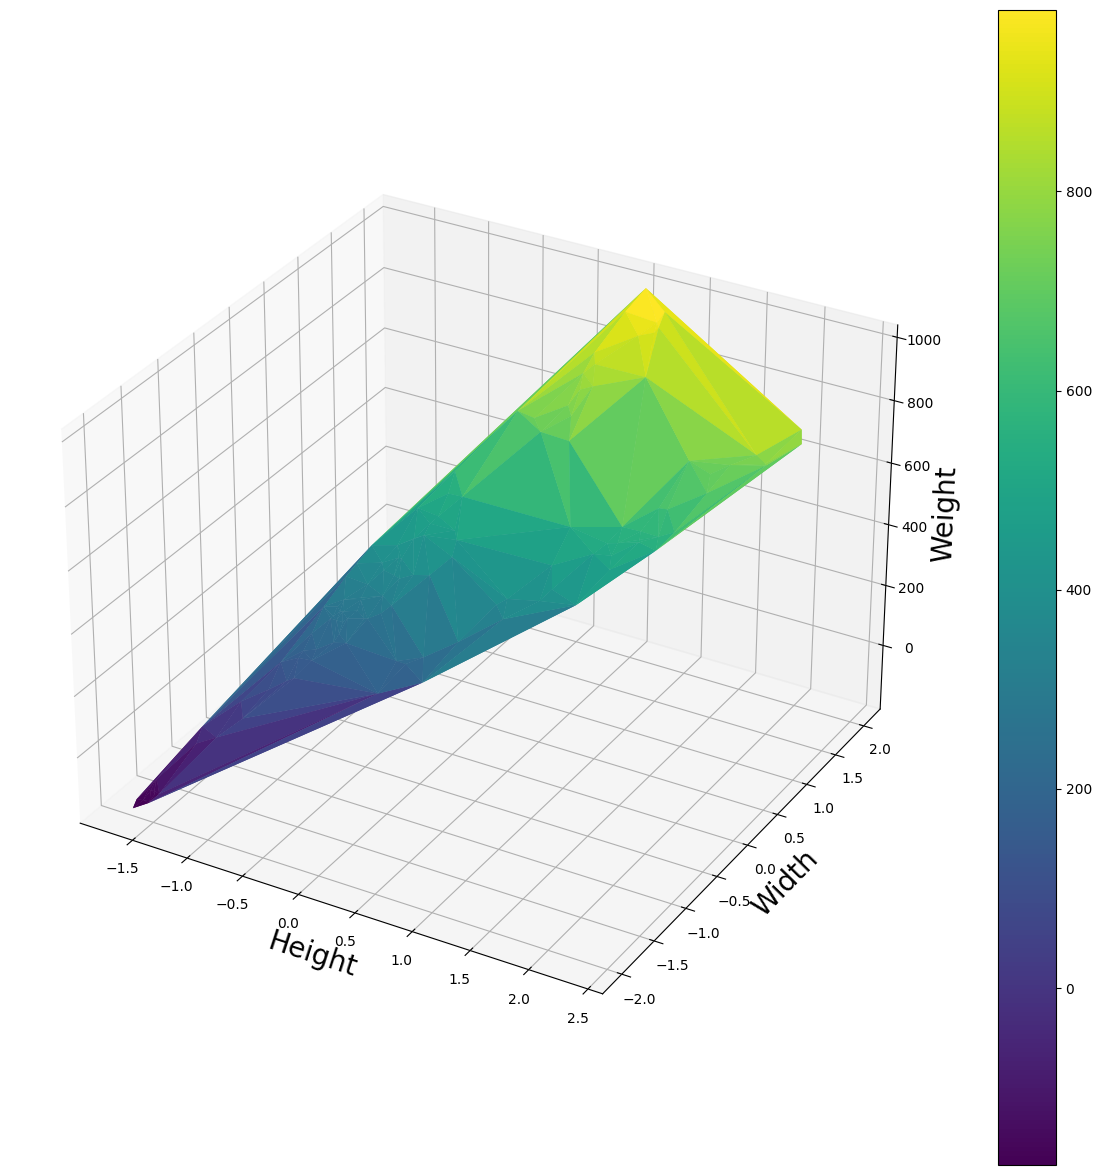

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=1)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0, 1, 6, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20)
surf = ax.plot_trisurf(x, y, z, cmap='viridis')
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()


#### Degree 2 Best Fit

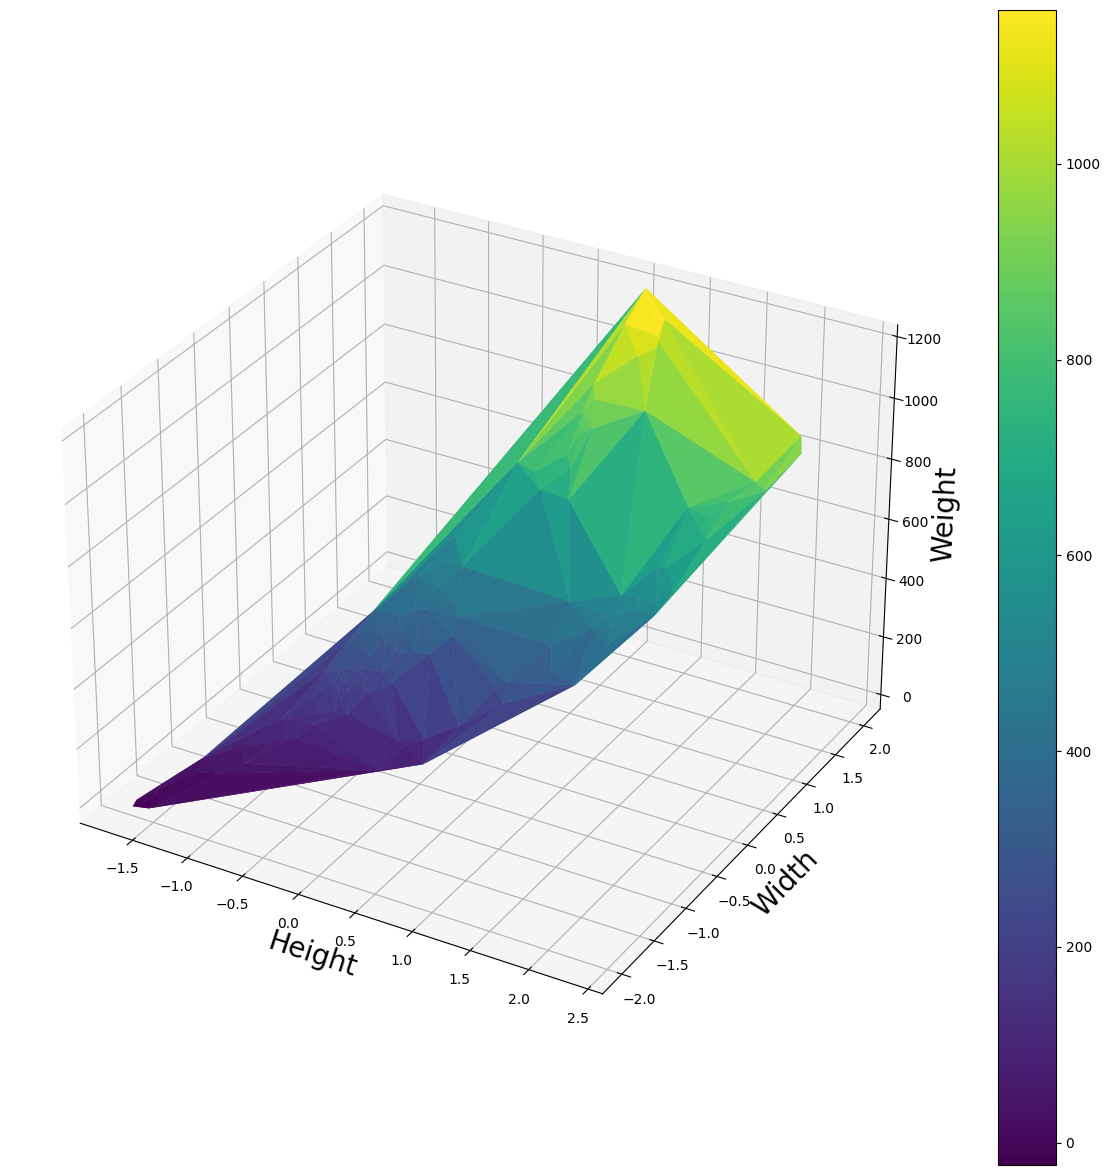

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))
data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=2)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0, 1, 9, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20) 
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()


#### Degree 3 best fit

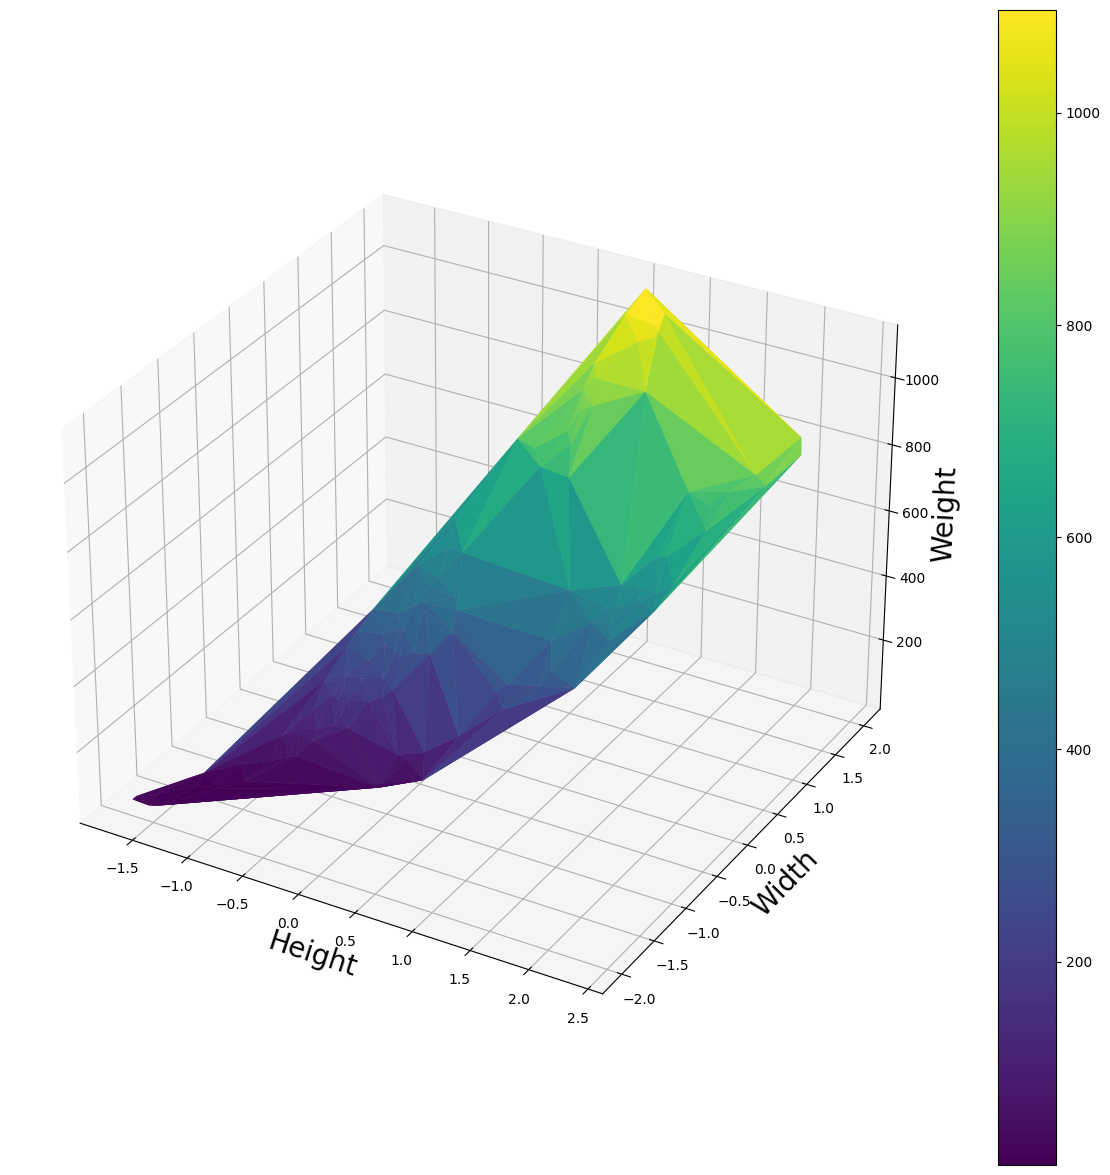

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=3)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0, 1, 8, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20)
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

#### Degree 4 Best Fit

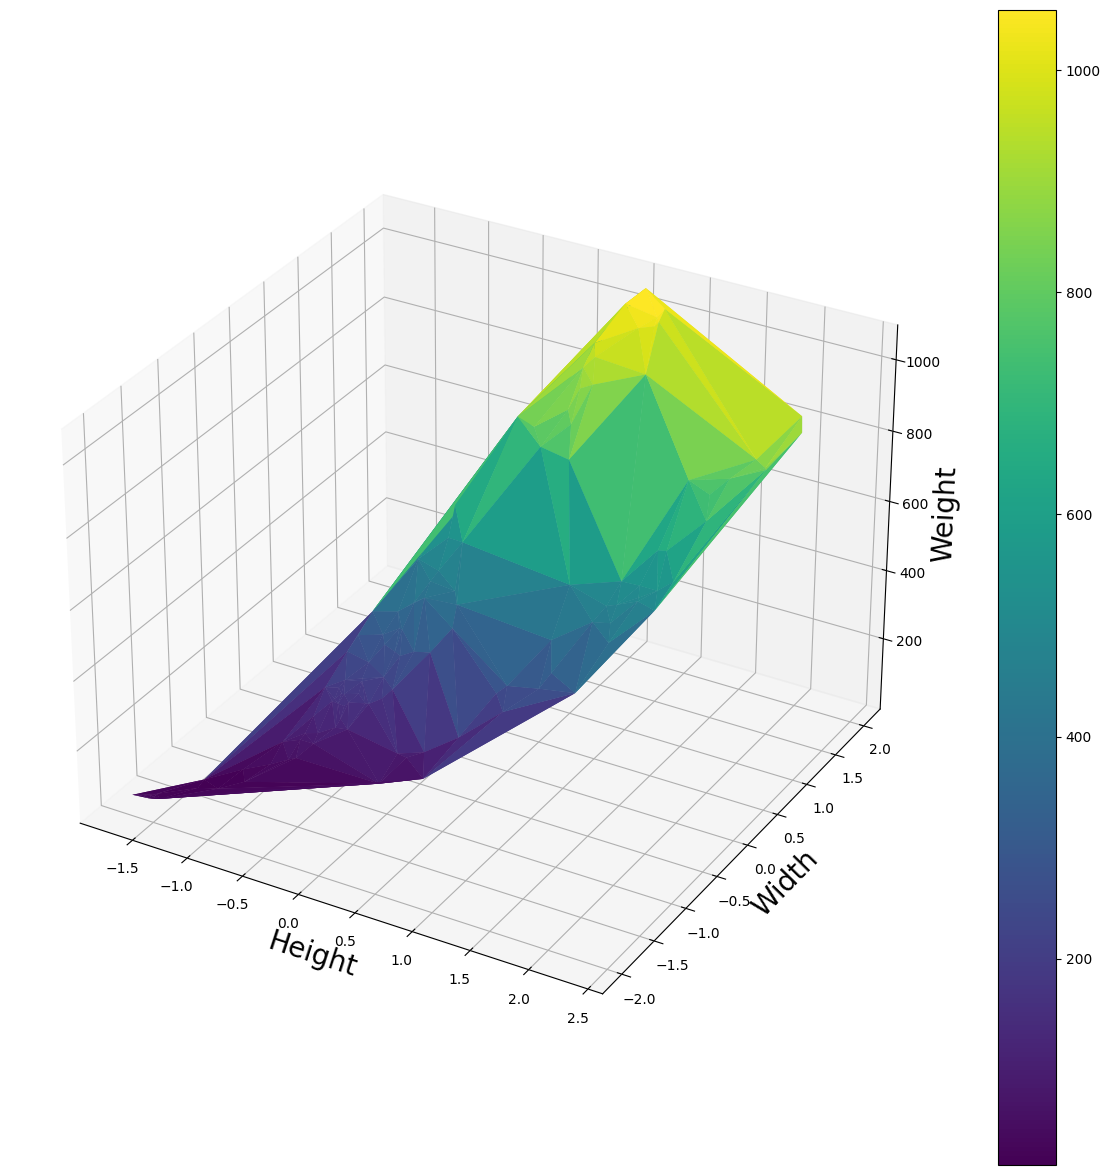

In [14]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=4)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0, 1, 7, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20) 
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

#### Degree 5 Best Fit

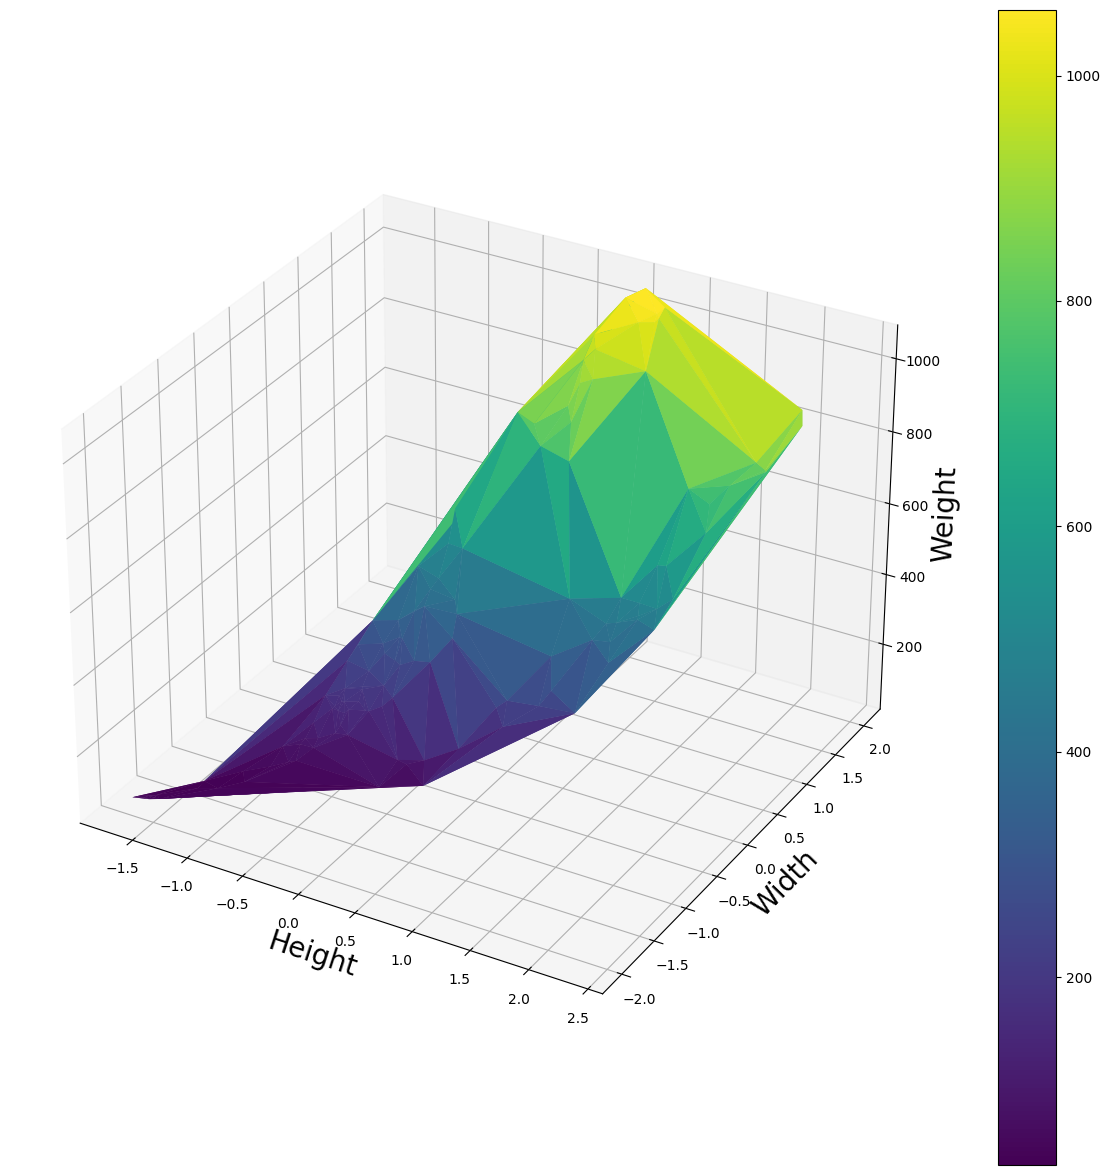

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=5)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0, 1, 7, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20)
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

#### Degree 6 Best Fit

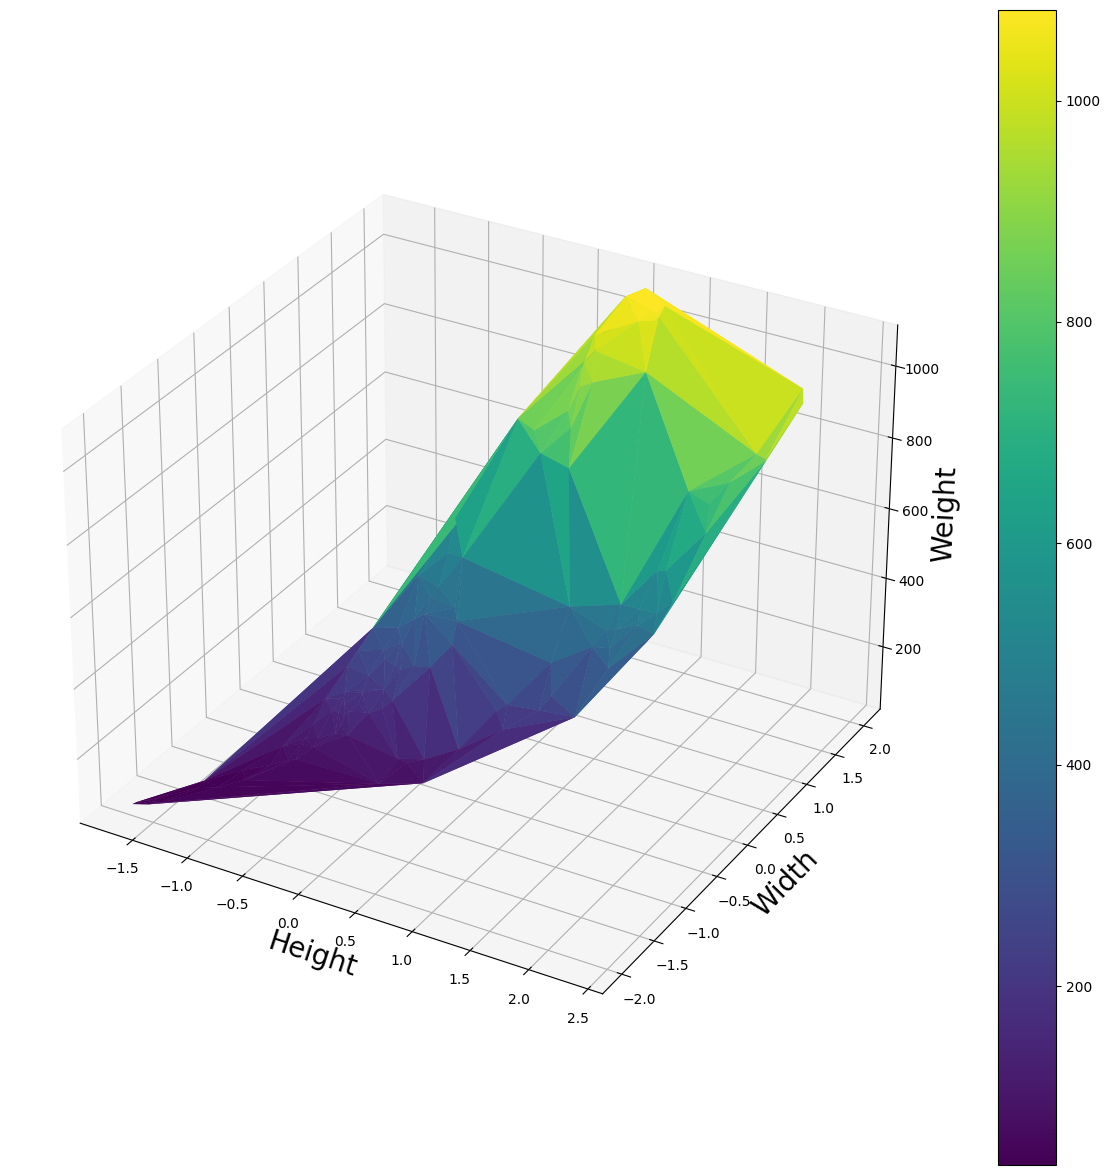

In [16]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=6)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0, 1, 6, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20) 
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

#### Degree 7 Best Fit

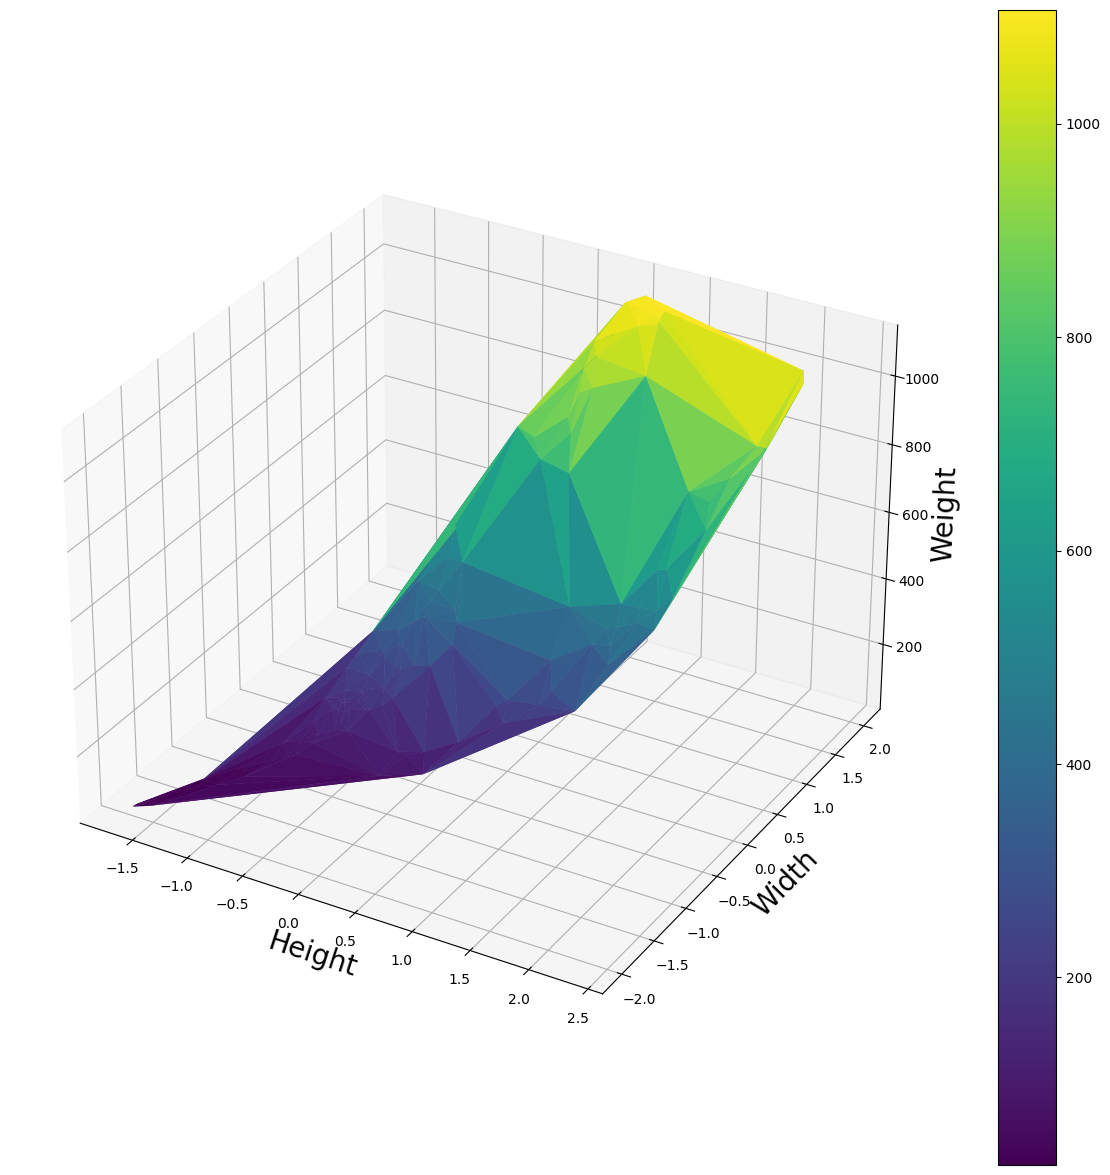

In [17]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=7)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0, 1, 5, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20)
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

#### Degree 8 Best Fit

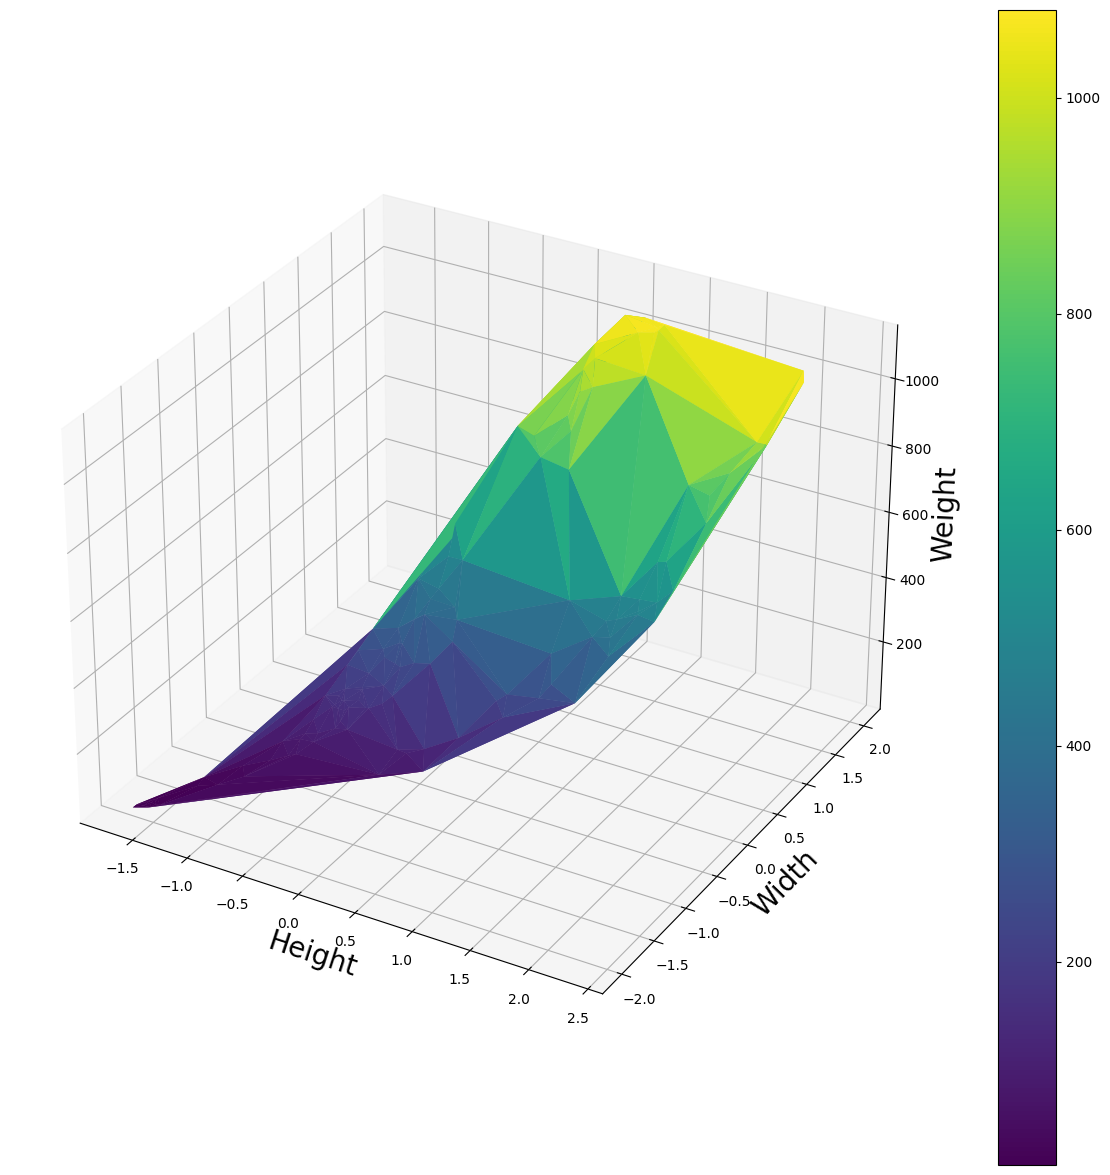

In [18]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=8)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0, 1, 4, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20)
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

#### Degree 9 Best fit

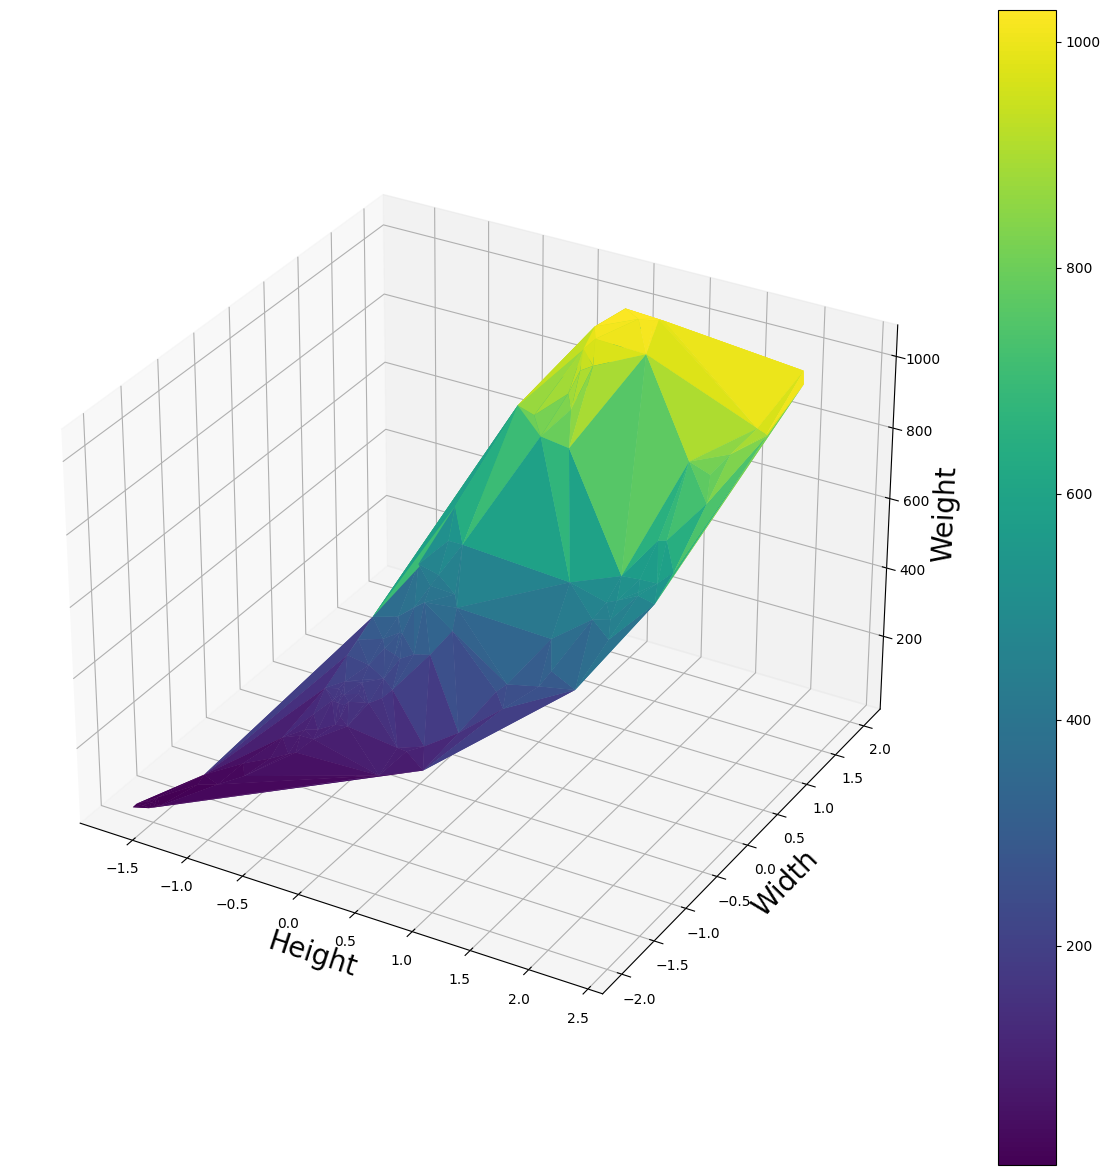

In [19]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=9)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0, 1, 3, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20)
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

### Optimal Regularized Linear Regression Model Surface Plot

#### Q = 0.5

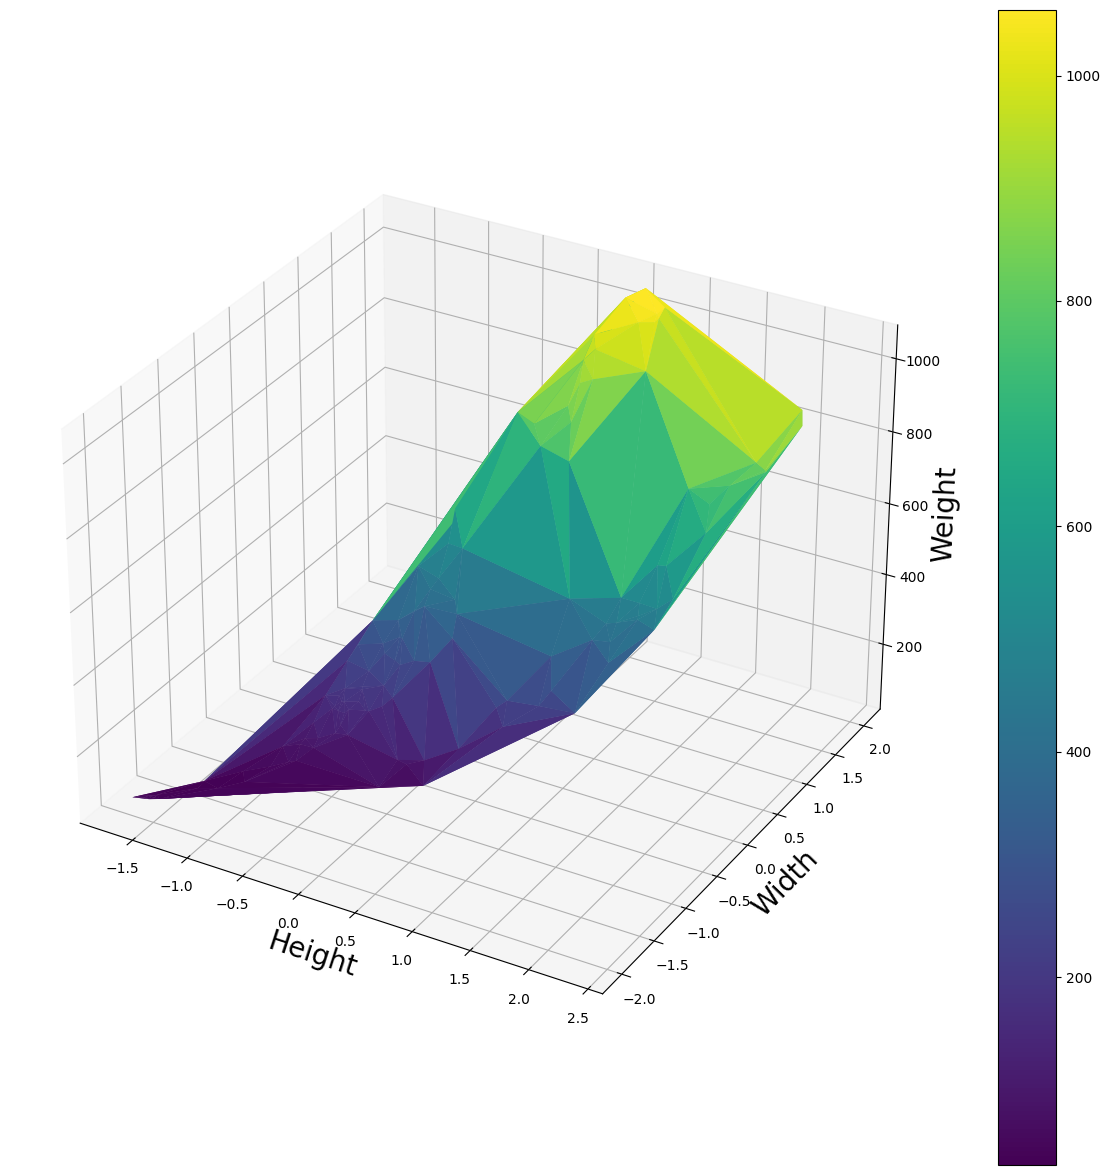

In [20]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=5)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 0.5, 1e-20, 7, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20)
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

#### Q = 1

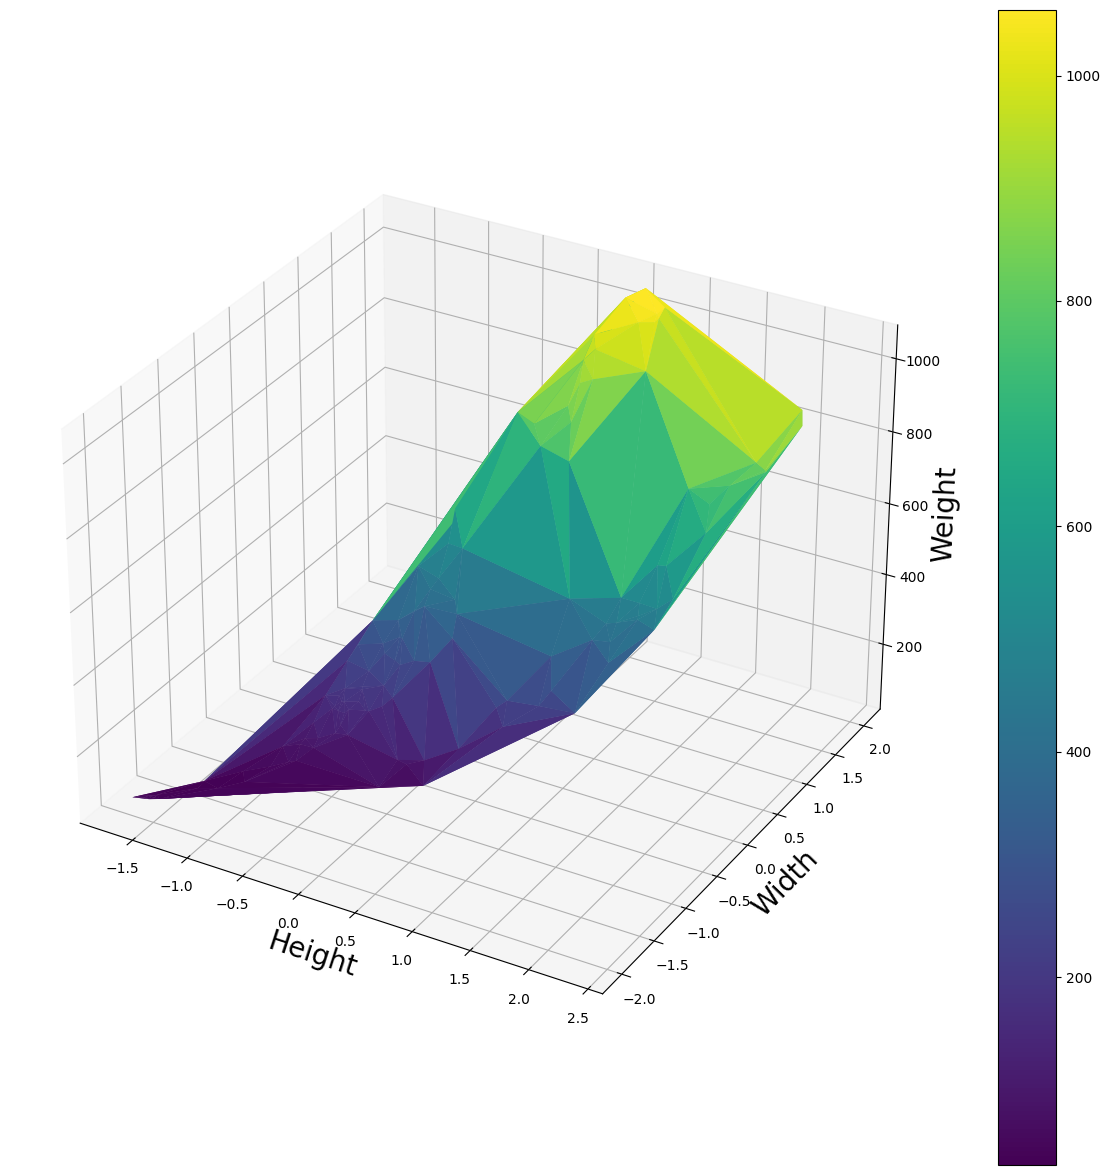

In [21]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=5)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 1, 1e-20, 7, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20)
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

#### Q = 2

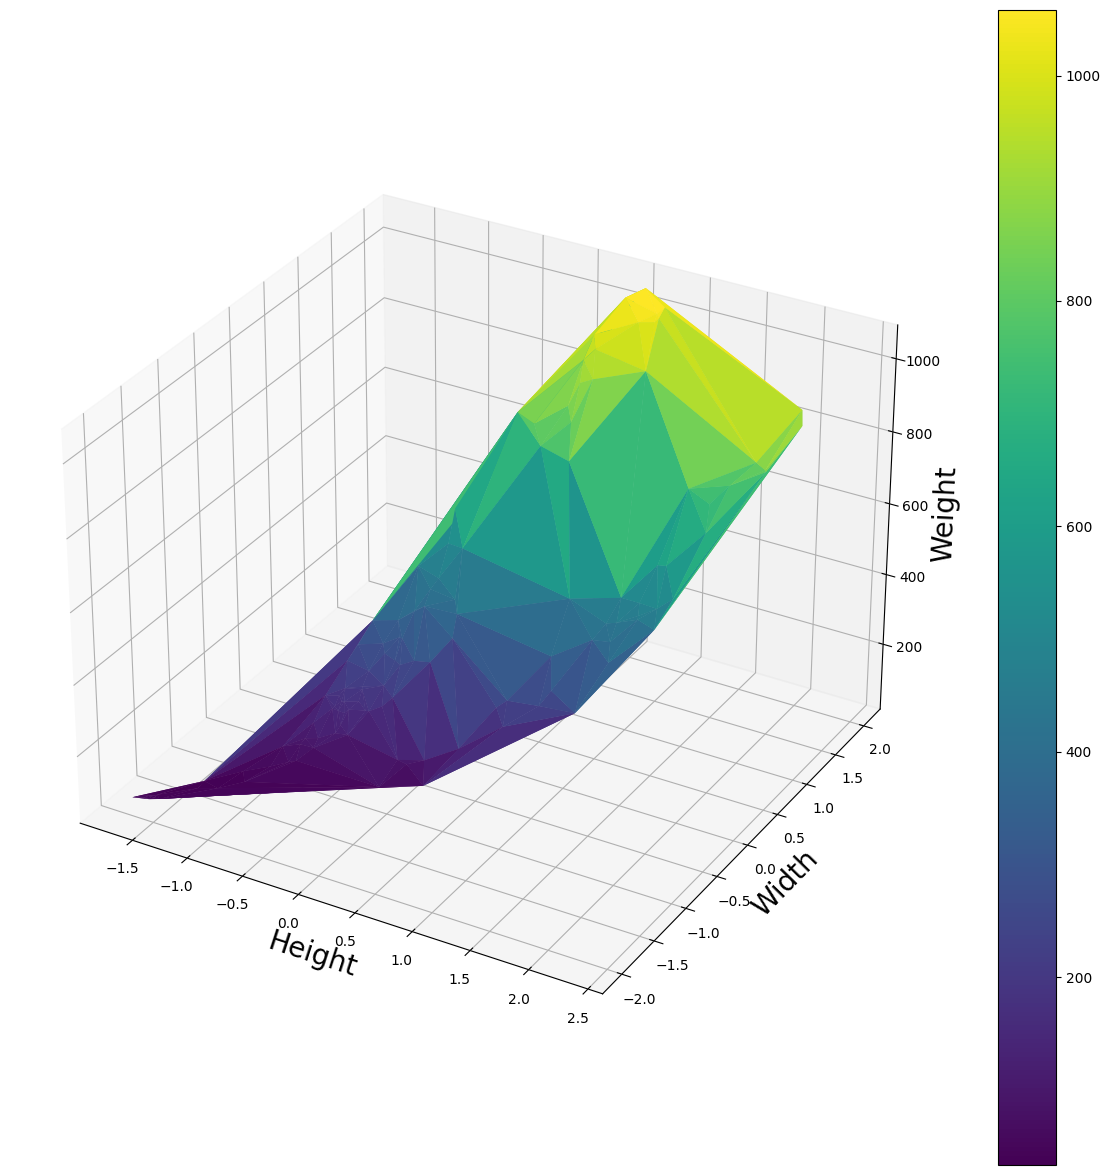

In [22]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=5)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 2, 1e-20, 7, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20)
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

#### Q = 4

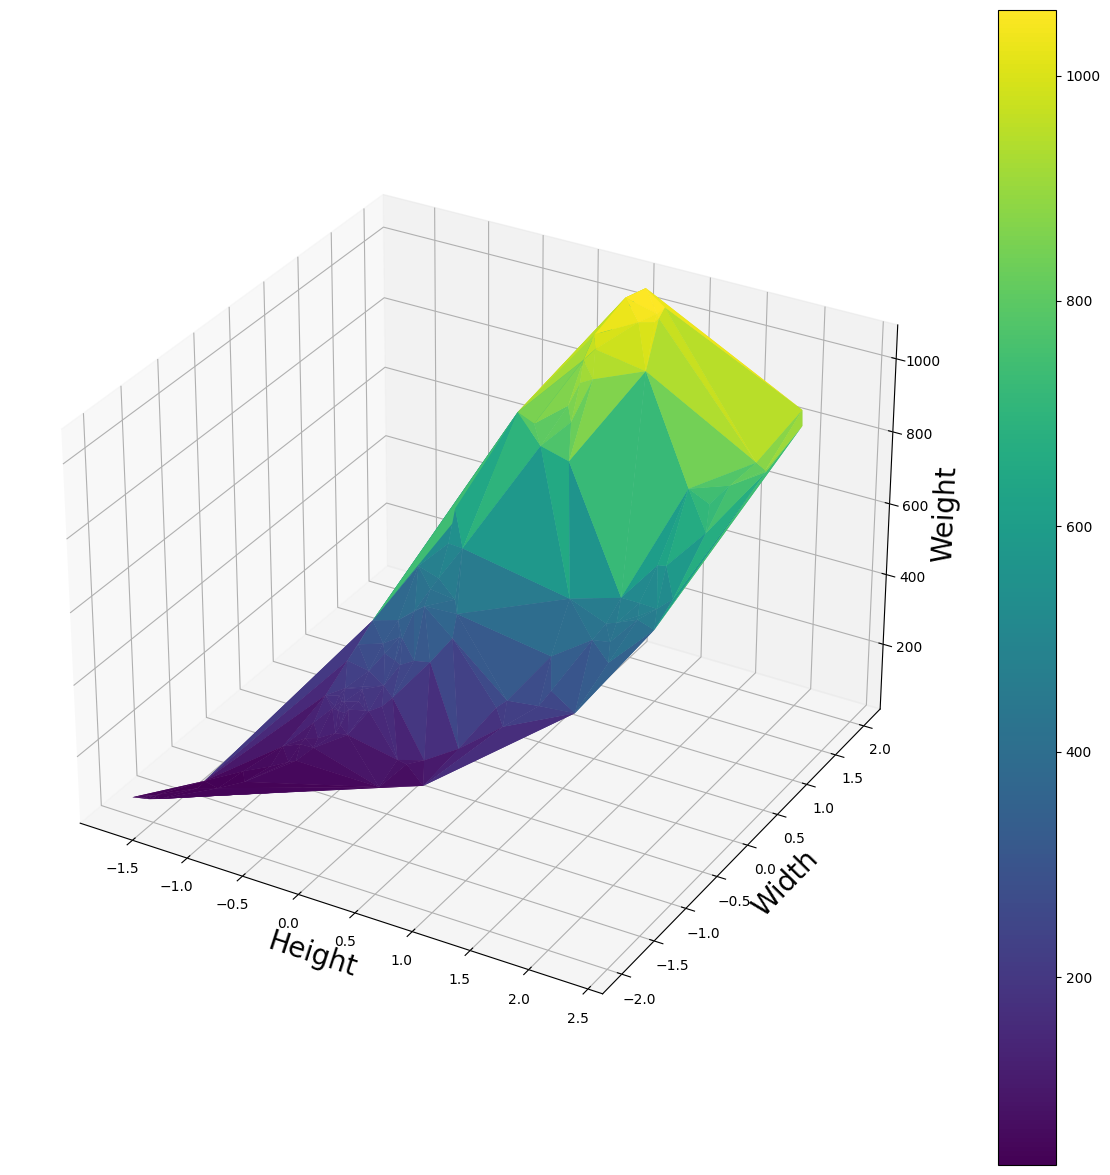

In [23]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(15, 15))

data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=5)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data)
W = stochastic(train, 4, 1e-20, 7, 50000)
x = train['Height']
y = train['Width']
X_train = train.iloc[:, :-1]
z = X_train @ W
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Height', fontsize = 20)
ax.set_ylabel('Width', fontsize = 20)
ax.set_zlabel('Weight', fontsize = 20)
surf = ax.plot_trisurf(x, y, z, cmap='viridis') 
fig.colorbar(surf)
# show command is used to visualize data plot   
plt.show()

# Task 4. Comparative Analysis

## Tabulation of MSE vs Degree

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def test_train_batch_plotter(q: float, degree: int = 1, learning_rate = 0.1, lmda = 1.0, max_iterations = 500) -> tuple[float, float]:
  data = pd.read_csv('Fish.csv')
  fillNans(data)
  poly_transform(data, degree=degree)
  normalize(data)
  insert_dummy1s(data)
  # taking average for better prediction
  test, train = test_train_split(data)
  W = batch(train, q, lmda, learning_rate, max_iterations)
  X_test = test.iloc[:, :-1]
  Y_test = test.iloc[:, -1]
  X_train = train.iloc[:, :-1]
  Y_train = train.iloc[:, -1]
  return mse(Y_test, X_test @ W),  mse(Y_train, X_train @ W)

def test_train_stochastic_plotter(q: float, degree: int = 1, learning_rate = 0.1, lmda = 1.0, max_iterations = 500) -> tuple[float, float]:
  data = pd.read_csv('Fish.csv')
  fillNans(data)
  poly_transform(data, degree=degree)
  normalize(data)
  insert_dummy1s(data)
  test, train = test_train_split(data)
  W = stochastic(train, q, lmda, learning_rate, max_iterations)
  X_test = test.iloc[:, :-1]
  Y_test = test.iloc[:, -1]
  X_train = train.iloc[:, :-1]
  Y_train = train.iloc[:, -1]
  return mse(Y_test, X_test @ W), mse(Y_train, X_train @ W)

for q in [0, 0.5, 1, 2, 4]:
  print("q:", q)
  for d in range(1,10):
    print("Degree:", d)
    b = test_train_batch_plotter(q ,d, 0.05, 1e-20, 50000)
    print("Batch Test Error:", b[0], ":: Batch Train Error:", b[1], end=" ::: ")
    s = test_train_stochastic_plotter(q ,d, 7, 1e-30, 50000)
    print("Stochastic Test Error:", s[0], ":: Stochastic Train Error:", s[1])


q: 0
Degree: 1
Batch Test Error: 54929.79617184895 :: Batch Train Error: 20953.250550212564 ::: Stochastic Test Error: 51559.63314161215 :: Stochastic Train Error: 22073.3716280172
Degree: 2
Batch Test Error: 48393.66927539276 :: Batch Train Error: 13907.15282550635 ::: Stochastic Test Error: 44622.411066866225 :: Stochastic Train Error: 15285.528540084084
Degree: 3
Batch Test Error: 46574.57009426728 :: Batch Train Error: 12922.622493810653 ::: Stochastic Test Error: 42194.11225488238 :: Stochastic Train Error: 14242.03226553932
Degree: 4
Batch Test Error: 45299.59229627913 :: Batch Train Error: 12405.52808553427 ::: Stochastic Test Error: 40691.89613186497 :: Stochastic Train Error: 13862.179251271926
Degree: 5
Batch Test Error: 45460.67929145778 :: Batch Train Error: 12233.438134012156 ::: Stochastic Test Error: 40220.34835530857 :: Stochastic Train Error: 14803.377147231015
Degree: 6
Batch Test Error: 46192.70534680365 :: Batch Train Error: 12176.776606556223 ::: Stochastic Test Er

C:\Users\sbgup\AppData\Local\Temp\ipykernel_3744\2547123701.py:25: RuntimeWarning: overflow encountered in power
  gradient = (1/n) * x_i * (y_pred - y_i) + (lmbda*0.5*q)*(W**(q-1))
C:\Users\sbgup\AppData\Local\Temp\ipykernel_3744\2547123701.py:25: RuntimeWarning: invalid value encountered in add
  gradient = (1/n) * x_i * (y_pred - y_i) + (lmbda*0.5*q)*(W**(q-1))
C:\Users\sbgup\AppData\Local\Temp\ipykernel_3744\2547123701.py:26: RuntimeWarning: invalid value encountered in subtract
  W -= learning_rate * gradient


Stochastic Test Error: nan :: Stochastic Train Error: nan
Degree: 9
Batch Test Error: 46850.216950188 :: Batch Train Error: 12150.492311128111 ::: 

C:\Users\sbgup\AppData\Local\Temp\ipykernel_3744\2547123701.py:25: RuntimeWarning: overflow encountered in power
  gradient = (1/n) * x_i * (y_pred - y_i) + (lmbda*0.5*q)*(W**(q-1))
C:\Users\sbgup\AppData\Local\Temp\ipykernel_3744\2547123701.py:26: RuntimeWarning: invalid value encountered in subtract
  W -= learning_rate * gradient


Stochastic Test Error: nan :: Stochastic Train Error: nan


From the tabulation of MSE vs degree and q; we observe that stochastic gradient descent gives us better results faster. We also observe that it fails for high q and degree values because of going through the data points one by one, thus encountering large variations in W at the start.
We observe that degrees 4 and 5 (with degree 4 giving a slightly lesser mse) give the least average error across all models.

By carefully adjusting lambda, iterations and learning rate we can make all the regularized best fit curves give the same optimal errors; 

## The best plot in 2D

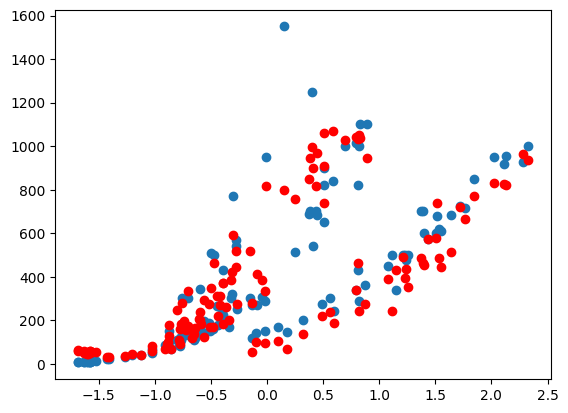

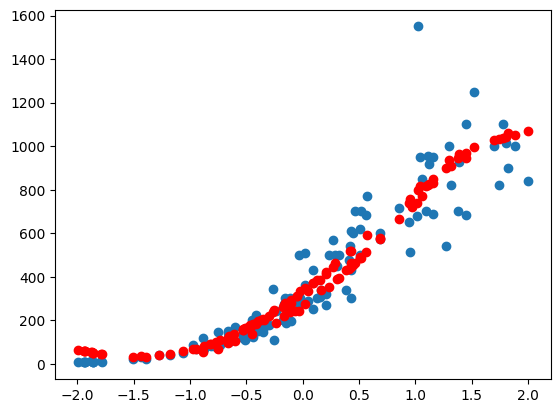

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Fish.csv')
fillNans(data)
poly_transform(data, degree=5)
normalize(data)
insert_dummy1s(data)
test, train = test_train_split(data ,0.2 , 0)
X1_train_plot = train.iloc[:, 1]
X2_train_plot = train.iloc[:, 2]
X_train = train.iloc[:, :-1]
Y_train = train.iloc[:, -1]
W = stochastic(train, 2, 1e-20, 7, 50000)
plt.scatter(X1_train_plot, Y_train)
plt.scatter(X1_train_plot, X_train @ W.T, color='red')
plt.show()
plt.scatter(X2_train_plot, Y_train)
plt.scatter(X2_train_plot, X_train @ W.T, color='red')
plt.show()